# Machine Learning
## 1.Supervised Learning
### -- Regression
### -- Classification 

## 2.UnSupervised Learning
### -- Clustering


### LINEAR REGRESSION


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SORU 1: Neden numpy, pandas,matplotlib,seaborn yüklendi. Özellikleri neler?


pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score


### Cevap 1
Numpy büyük sayılarla,çok boyutlu dizilerle ve matrislerle işlemler yapmamızı kolaylaştırıyor. <br>
Pandas dataframeler ile işlem yapmamızı sağlar.<br>
Matplotlib veri görselleştirmesinde kullandığımız temel python kütüphanesidir. 2 ve 3 boyutlu çizimler yapmamızı sağlar.<br>
Seaborn Python'da ilgi çekici ve bilgilendirici istatistiksel grafikler yapmak için kullanılan bir kütüphanedir.<br>

In [5]:
df = pd.read_csv("advertising.csv")
# csv formaatında olan bir dosyayı okuyoruz.

In [6]:
df.shape

(200, 4)

In [7]:
df.head(5)

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [8]:
df.tail()
# SORU 2: BURADAKİ BAĞIMSIZ VE BAĞIMLI DEĞİŞKENLER NEDİR?

,TV,radio,newspaper,sales
195,38.20,3.70,13.80,7.60
196,94.20,4.90,8.10,9.70
197,177.00,9.30,6.40,12.80
198,283.60,42.00,66.20,25.50
199,232.10,8.60,8.70,13.40


In [9]:
df.describe().T
# Aykırı değerleri saptamak için kullanılan fonksiyonlardan biri


,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


In [10]:
# SORU 3: Linear fonksiyonun denklemi nedir?

In [11]:
df["sales"]

0     22.10
1     10.40
2      9.30
3     18.50
4     12.90
       ... 
195    7.60
196    9.70
197   12.80
198   25.50
199   13.40
Name: sales, Length: 200, dtype: float64

In [12]:
df[["sales"]]

,sales
0,22.10
1,10.40
2,9.30
3,18.50
4,12.90
...,...
195,7.60
196,9.70
197,12.80
198,25.50


In [13]:
type(df["sales"])

pandas.core.series.Series

In [14]:
type(df[["sales"]])

pandas.core.frame.DataFrame

In [17]:
reg_model.intercept_[0]

7.032593549127694

In [19]:
reg_model.coef_[0][0]

0.04753664043301976

In [20]:
# y bagımlı ve X bagımsız degiskenler
X = df[["TV"]]
y = df[["sales"]]

# Model
reg_model = LinearRegression().fit(X,y)

# y_hat = b + w*X 

# sabit (b - bias)
print("Sabit - bias değeri: ",reg_model.intercept_[0])

# TV'nin katsayısı (w1)
print("Katsayı değeri     : ",reg_model.coef_[0][0])

# Tahmin

# b 23, w 1 iken 500 birimlik TV harcaması olsa ne kadar satış olması beklenir? 
# Bizim bu işlemi yaparken yaptığımız şeyi blgisayar girdiğimiz her bir değer için hesaplayacak

# bu formulden dusun y_hat = b + w*X 
print(reg_model.intercept_[0] + reg_model.coef_[0][0] * 500)

Sabit - bias değeri:  7.032593549127694
Katsayı değeri     :  0.04753664043301976
30.80091376563757


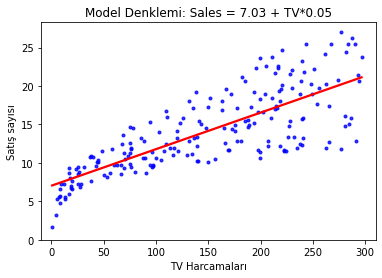

In [21]:
# Modelin Görselleştirilmesi
g = sns.regplot(x=X, y=y,scatter_kws={'color':'b','s':9},
               ci=False,color="r")
g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0],2)} + TV*{round(reg_model.coef_[0][0],2)}")
g.set_ylabel("Satış sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [22]:

# Tahmin Başarısı

# Linear Regression ile oluşturduğumuz model ne kadar başarılı
# Bunları hesaplamak için bazı hata hesaplama işlemleri var MSE,RMSE,MAE,R-KARE gibi
print("y mean:\n",y.mean(), "\ny std:\n", y.std())

# MSE (Mean Squared Error)
y_pred = reg_model.predict(X)
print("MSE:\n",mean_squared_error(y,y_pred))

# RMSE (Root Mean Squared Error)
print("RMSE:\n",np.sqrt(mean_squared_error(y,y_pred)))

# MAE (Mean Absolute Error)
print("MAE:\n",mean_absolute_error(y,y_pred))

# R-KARE
print("R-KARE:\n", reg_model.score(X,y))

y mean:
 sales   14.02
dtype: float64 
y std:
 sales   5.22
dtype: float64
MSE:
 10.512652915656759
RMSE:
 3.2423221486546887
MAE:
 2.549806038927486
R-KARE:
 0.611875050850071


In [24]:
#?sns.regplot
#?mean_squared_error


### Logistic Regression

In [25]:
import numpy
from sklearn import linear_model

#X represents the size of a tumor in centimeters.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)

#Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.

#y represents whether or not the tumor is cancerous (0 for "No", 1 for "Yes").
# burada y label'lar
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)
#predict if tumor is cancerous where the size is 3.46mm:
predicted0 = logr.predict(numpy.array([2.03]).reshape(-1,1))
predicted1 = logr.predict(numpy.array([5.11]).reshape(-1,1))
print("predicted0 değeri: ",predicted0)
print("predicted1 değeri: ",predicted1)

predicted0 değeri:  [0]
predicted1 değeri:  [1]


<AxesSubplot:>

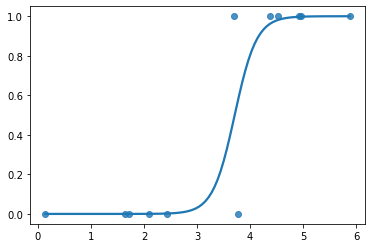

In [26]:
#plot logistic regression curve
sns.regplot(x=X, y=y, data=df, logistic=True, ci=None)

### Clustering (Kümeleme)

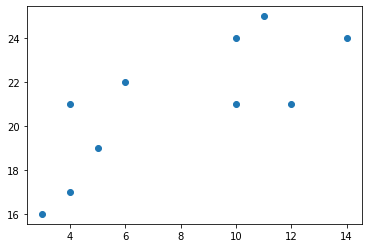

In [27]:
# Öncesi
import numpy as np
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()


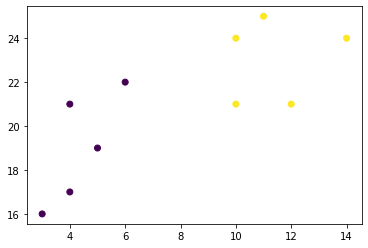

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

In [23]:
# affinity: yakınlık, euclidean: öklid, 